In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import Holt

O modelo de Holt é utilizado em séries que apresentam tendência, sem a presença de sazonalidade, ou seja, séries com a seguinte forma:

$$Z(t) = \mu(t) + T(t) + a(t)$$

Onde $\mu$ representa o nível médio (que varia lentamente)  da nossa série, $T(t)$ a tendência e $a(t)$ é a componente estocástica.

O modelo de Holt é composto por uma componente de nívele uma componente de tendência. Tendo como a seguinte estrutura:

$$\hat{Z}(h) = \bar{Z}(t) + h\hat{T}(t), \enspace \forall h > 0 $$

Sendo **h** o ponto no futuro a ser previsto $\bar{Z}(t)$ uma estimativa para o nível da série e $h\hat{T}(t)$ representando a tendência. As funções que compôem o modelo de Holt são calculadas da seguinte maneira:

$\bar{Z}(t) = AZ(t) + (1 - A)[\bar{Z}(t - 1) + \hat{T}(t - 1)], \enspace \text{Onde:} \enspace 0 < A < 1 \enspace \text{e} \enspace t = 2,\dots,N$

Considerando:  $\bar{Z}(2) = Z(2)$

$\hat{T}(t) = C[\bar{Z}(t) - \bar{Z}(t - 1)] + (1 - C)\hat{T}(t - 1),  \enspace \text{Onde:} \enspace 0 < C < 1 \enspace \text{e} \enspace t = 2,\dots,N$

Considerando: $\hat{T}(2) = Z(2) - Z(1)$


$A$ e $C$ são chamadas de constante de suavização.

In [2]:
df = pd.read_excel('/content/drive/MyDrive/Time Series Studies/ICV.xls')

In [3]:
serie = df['ICV'][:-12]
test = df['ICV'][-12:]
t = np.arange(1,len(serie) + 1)
t_test = np.arange(len(t) + 1, len(t) + len(test) + 1)

In [4]:
# holt_model = Holt(serie).fit(smoothing_level=0.5, smoothing_trend=0.5)
holt_model = Holt(serie).fit(optimized = True) # O modelo irá encontrar as melhores constantes de suavização

print(f"Melhor smoothing_level (α): {holt_model.model.params['smoothing_level']:.4f}")
print(f"Melhor smoothing_trend (β*): {holt_model.model.params['smoothing_trend']:.4f}")

future_steps = 12
forecast = holt_model.forecast(future_steps)

forecast_index = np.arange(len(serie) + 1, len(serie) + 1 + future_steps)

Melhor smoothing_level (α): 0.9753
Melhor smoothing_trend (β*): 0.2935


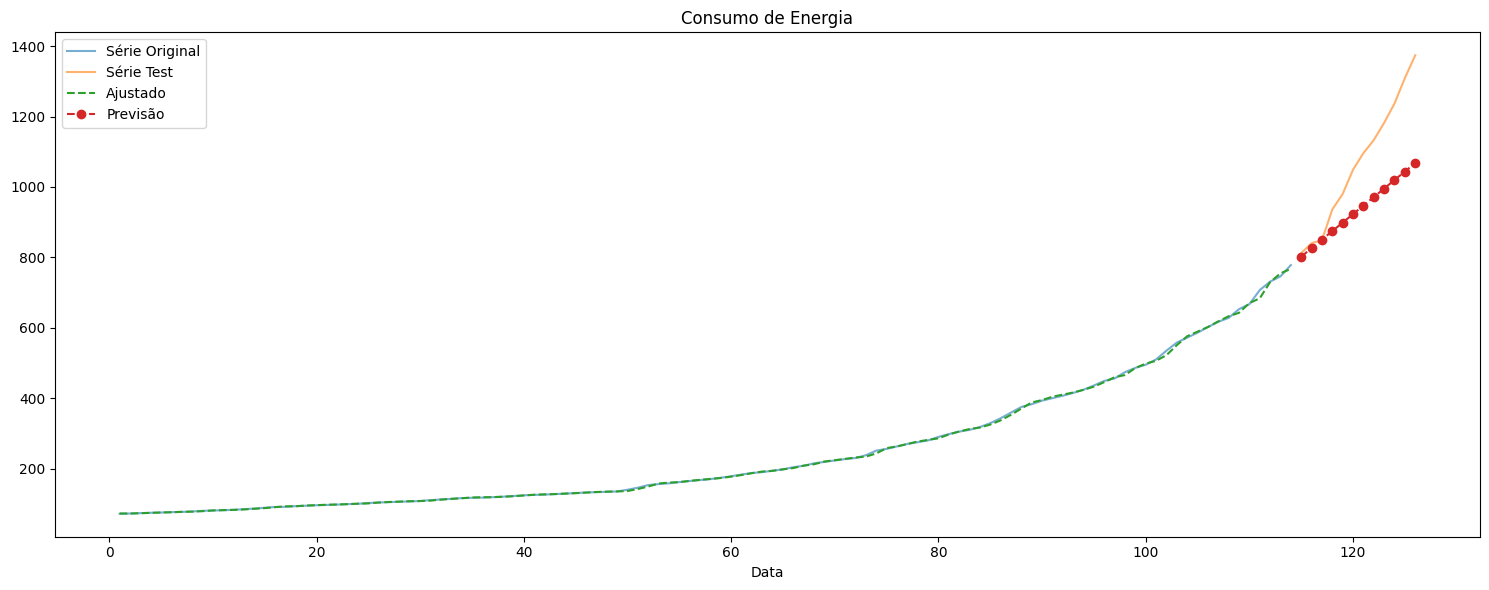

In [5]:
plt.figure(figsize=(15,6))

plt.plot(t, serie, label = 'Série Original', alpha = 0.6)
plt.plot(t_test, test, label = 'Série Test', alpha = 0.6)
plt.plot(t, holt_model.fittedvalues, label='Ajustado', linestyle='dashed')
plt.plot(forecast_index, forecast, marker='o', linestyle='dashed', label='Previsão')

plt.title('Consumo de Energia')
plt.xlabel('Data')
plt.legend()
plt.tight_layout()
plt.show()

Iteração 1 - α: 0.9753, β*: 0.2935
Iteração 1 - Previsão: 801.9260490322978
Dados de treinamento atualizados: [707.0, 731.0, 746.0, 778.0, 801.9260490322978]
Iteração 2 - α: 0.9753, β*: 0.2935
Iteração 2 - Previsão: 826.1153887305006
Dados de treinamento atualizados: [731.0, 746.0, 778.0, 801.9260490322978, 826.1153887305006]
Iteração 3 - α: 0.9753, β*: 0.2935
Iteração 3 - Previsão: 850.3047271597793
Dados de treinamento atualizados: [746.0, 778.0, 801.9260490322978, 826.1153887305006, 850.3047271597793]
Iteração 4 - α: 0.9753, β*: 0.2935
Iteração 4 - Previsão: 874.4940671228384
Dados de treinamento atualizados: [778.0, 801.9260490322978, 826.1153887305006, 850.3047271597793, 874.4940671228384]
Iteração 5 - α: 0.9753, β*: 0.2935
Iteração 5 - Previsão: 898.6834058755262
Dados de treinamento atualizados: [801.9260490322978, 826.1153887305006, 850.3047271597793, 874.4940671228384, 898.6834058755262]
Iteração 6 - α: 0.9753, β*: 0.2935
Iteração 6 - Previsão: 922.872745153157
Dados de treina

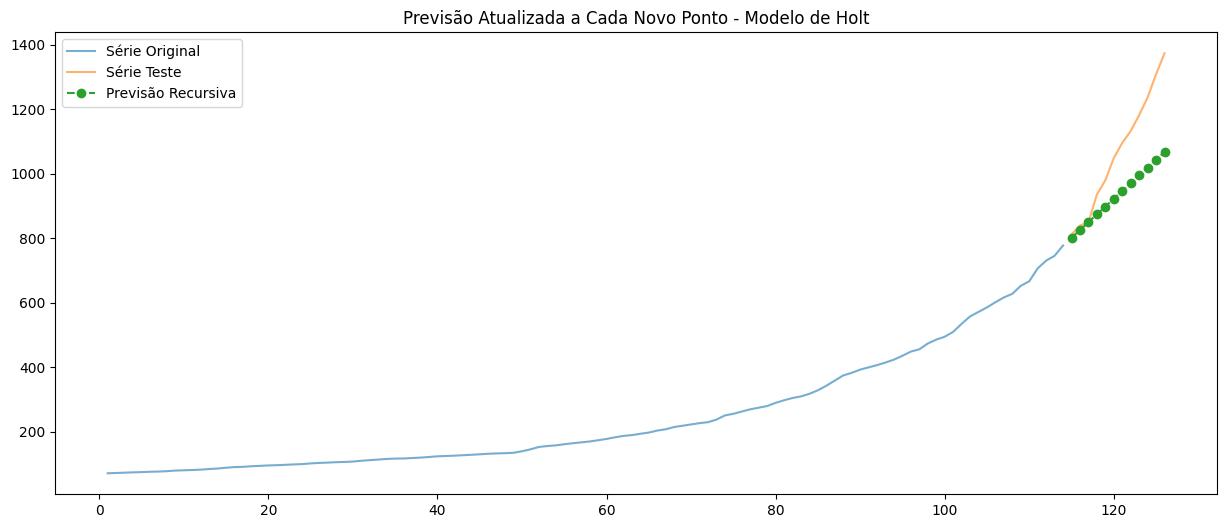

In [6]:
# Definição do número de períodos futuros a serem previstos
future_steps = 12
rolling_forecast = []  # Lista para armazenar previsões

# Inicializa a série de treinamento como uma lista
train_data = serie.tolist()

# Loop para previsão recursiva
for i in range(future_steps):

    # Converte para pandas Series a cada iteração para compatibilidade com Holt
    train_series = pd.Series(train_data)

    # Ajusta o modelo aos dados disponíveis
    model = Holt(train_series).fit(optimized=True)

    print(f"Iteração {i+1} - α: {model.params['smoothing_level']:.4f}, β*: {model.params['smoothing_trend']:.4f}")

    # Faz previsão para o próximo período
    next_forecast = model.forecast(1).iloc[0]

    # Adiciona a previsão à lista de previsões
    rolling_forecast.append(next_forecast)

    # Atualiza os dados de treinamento adicionando a previsão
    train_data.append(next_forecast)

    print(f"Iteração {i+1} - Previsão: {next_forecast}")
    print(f"Dados de treinamento atualizados: {train_data[-5:]}")  # Exibe os últimos 5 valores

# Criando índices para os períodos futuros
forecast_index = np.arange(len(serie) + 1, len(serie) + 1 + future_steps)

# Plotando os resultados
plt.figure(figsize=(15,6))

plt.plot(t, serie, label = 'Série Original', alpha = 0.6)
plt.plot(t_test, test, label = 'Série Teste', alpha = 0.6)
plt.plot(forecast_index, rolling_forecast, marker='o', linestyle='dashed', label='Previsão Recursiva')
plt.title('Previsão Atualizada a Cada Novo Ponto - Modelo de Holt')
plt.legend()
plt.show()